# Usuarios de Computadoras y Smartphones

En este notebook se van a analizar la cantidad de usuarios de Computadoras e Internet. Además de revisar ciertas diferencias en los usos que se les da. Son pocos los valores de interés pero suficientes para poder enmarcar diferencias entre usuarios.

## Porcentaje de usuarios con acceso a TIC's

#### Importando librerias

In [1]:
import pandas as pd
import numpy as np

Visualizando datos. Ya que las tablas están divididas, serán dos las que se tengan que visualizar. Son: ENDUTIH_USUARIO_2021 y ENDUTIH_USUARIO2_2021.

In [2]:
path_usuario1 = ("../data/ENDUTIH_2021_transformed/ENDUTIH_USUARIO_2021.csv") 
path_usuario2 = ("../data/ENDUTIH_2021_transformed/ENDUTIH_USUARIO2_2021.csv")
df_usuario1 = pd.read_csv(path_usuario1)
df_usuario2 = pd.read_csv(path_usuario2)
df_usuario1.head()

,UPM,VIV_SEL,HOGAR,NUM_REN,EDAD,P6_1,P6_2_1,P6_2_2,P6_2_3,P6_3,...,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO,PAREN,SEXO,NIVEL,GRADO,ENT
0,100023,1,1,1,41,1,2,1,2,-1,...,1,7,U,1,3,1,2,10,2,1
1,100023,2,1,3,23,1,2,1,2,-1,...,1,7,U,1,3,3,2,6,3,1
2,100023,3,1,1,50,1,2,1,2,-1,...,1,7,U,1,3,1,2,8,4,1
3,100023,4,1,2,55,2,-1,-1,-1,2,...,1,7,U,1,3,2,2,2,6,1
4,100023,5,1,3,32,1,2,1,2,-1,...,1,7,U,1,3,3,2,8,5,1


In [3]:
df_usuario2.head()

,UPM,VIV_SEL,HOGAR,NUM_REN,EDAD,P8_1,P8_2,P8_2A,P8_3,P8_4_1,...,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO,PAREN,SEXO,NIVEL,GRADO,ENT
0,100023,1,1,1,41,1,-1,Desconocido,1,2,...,1,7,U,1,3,1,2,10,2,1
1,100023,2,1,3,23,1,-1,Desconocido,1,2,...,1,7,U,1,3,3,2,6,3,1
2,100023,3,1,1,50,1,-1,Desconocido,1,2,...,1,7,U,1,3,1,2,8,4,1
3,100023,4,1,2,55,1,-1,Desconocido,1,2,...,1,7,U,1,3,2,2,2,6,1
4,100023,5,1,3,32,1,-1,Desconocido,1,2,...,1,7,U,1,3,3,2,8,5,1


In [4]:
Total_población = df_usuario1["FAC_PER"].sum()
Total_población

117104776

Se enumera el número de filas y columnas para ver si los casos coinciden, pues se busca hacer comparaciones y es importante que cada caso coincida.

In [5]:
print(df_usuario1.shape)
print(df_usuario2.shape)


(59285, 226)
(59285, 95)


Variables a utilizar:  
En general: ESTRATO y   
Computadora: P6_2_1, P6_2_2 (usuario 1)  
Internet: P7_1  (usuario 1)  
Smartphone: P8_4_2 (usuario 2)

### Tabla de usuarios de computadoras

In [6]:
df_computadora = df_usuario1[["ESTRATO", "P6_2_1", "P6_2_2", "FAC_PER"]]
df_computadora

,ESTRATO,P6_2_1,P6_2_2,FAC_PER
0,3,2,1,173
1,3,2,1,1035
2,3,2,1,345
3,3,-1,-1,1381
4,3,2,1,518
...,...,...,...,...
59280,1,-1,-1,562
59281,1,-1,-1,579
59282,1,-1,-1,562
59283,1,-1,-1,187


#### Manejando valores nulos y negativos
Se eliminarán los valores etiquetados con -1 pues así fueron manejados, y también los valores negativos que están etiquetados con 2.

In [7]:
#Displaying values
columns_computadora = ["ESTRATO", "P6_2_1", "P6_2_2"]
for column in columns_computadora:
    print(column)
    print(df_computadora[column].value_counts(dropna=False))


ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P6_2_1
-1    38095
 2    12576
 1     8614
Name: P6_2_1, dtype: int64
P6_2_2
-1    38095
 1    14229
 2     6961
Name: P6_2_2, dtype: int64


In [8]:
#Replace the values of the columns of interest
df_computadora.replace({"P6_2_1": [-1, 2], "P6_2_2": [-1, 2]}, 0, inplace=True)
columns_computadora2 = ["ESTRATO", "P6_2_1", "P6_2_2"]
for column in columns_computadora2:
    print(column)
    print(df_computadora[column].value_counts(dropna=False))

ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P6_2_1
0    50671
1     8614
Name: P6_2_1, dtype: int64
P6_2_2
0    45056
1    14229
Name: P6_2_2, dtype: int64


/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [9]:
#new column from the two previous ones, if you have a pc or laptop, you are considered to have a computer.
computadoras_pye = df_computadora[["P6_2_1", "P6_2_2"]]
computadoras_pye["Computadora"] = (df_computadora["P6_2_1"] + df_computadora["P6_2_2"]).apply(lambda x: 1 if x >=1 else 0)
computadoras_columns = ["P6_2_1", "P6_2_2", "Computadora"]
for column in computadoras_columns:
    print(column)
    print(computadoras_pye[column].value_counts(dropna=False))


P6_2_1
0    50671
1     8614
Name: P6_2_1, dtype: int64
P6_2_2
0    45056
1    14229
Name: P6_2_2, dtype: int64
Computadora
0    40024
1    19261
Name: Computadora, dtype: int64


/tmp/ipykernel_876/1618396181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  computadoras_pye["Computadora"] = (df_computadora["P6_2_1"] + df_computadora["P6_2_2"]).apply(lambda x: 1 if x >=1 else 0)


In [10]:
df_computadora = df_computadora.drop("P6_2_1", axis=1)
df_computadora.loc[:,"P6_2_2"] = computadoras_pye["Computadora"]
df_computadora

,ESTRATO,P6_2_2,FAC_PER
0,3,1,173
1,3,1,1035
2,3,1,345
3,3,0,1381
4,3,1,518
...,...,...,...
59280,1,0,562
59281,1,0,579
59282,1,0,562
59283,1,0,187


### Ponderando los datos

In [11]:
df_computadora["P6_2_2"] = df_computadora["P6_2_2"].mul(df_computadora["FAC_PER"], axis=0)
df_computadora_group = df_computadora.groupby("ESTRATO").sum()
df_computadora_group

,P6_2_2,FAC_PER
ESTRATO,,
1,2735779,23557991
2,18665218,59724797
3,11413154,23264281
4,7051611,10557707


In [12]:
df_usuario2["FAC_PER"].sum()

117104776

### Tabla de usuarios de Internet

In [13]:
df_internet = df_usuario1[["ESTRATO", "P7_1", "FAC_PER"]]
df_internet

,ESTRATO,P7_1,FAC_PER
0,3,1,173
1,3,1,1035
2,3,1,345
3,3,1,1381
4,3,1,518
...,...,...,...
59280,1,1,562
59281,1,2,579
59282,1,2,562
59283,1,2,187


### Manejo de valores nulos y negativos

Como en la tabla anterior, se reemplazaran los valores considerados como nulos y negativos

In [14]:
#Displaying values
columns_internet = ["ESTRATO", "P7_1"]
for column in columns_internet:
    print(column)
    print(df_internet[column].value_counts(dropna=False))

ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P7_1
1    43146
2    16139
Name: P7_1, dtype: int64


In [15]:
#Replace values
df_internet.replace({"P7_1": {2: 0}}, inplace=True)
for column in columns_internet:
    print(column)
    print(df_internet[column].value_counts(dropna=False))

ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P7_1
1    43146
0    16139
Name: P7_1, dtype: int64


/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


### Ponderando los datos

In [16]:
df_internet["P7_1"] = df_internet["P7_1"].mul(df_internet["FAC_PER"], axis=0)
df_internet_group = df_internet.groupby("ESTRATO").sum()
df_internet_group

/tmp/ipykernel_876/2288044940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internet["P7_1"] = df_internet["P7_1"].mul(df_internet["FAC_PER"], axis=0)


,P7_1,FAC_PER
ESTRATO,,
1,12254998,23557991
2,46388508,59724797
3,20182574,23264281
4,9736169,10557707


### Tabla de usuarios de Smartphones

In [17]:
df_smartphone = df_usuario2[["ESTRATO", "P8_4_2", "FAC_PER"]]
df_smartphone

,ESTRATO,P8_4_2,FAC_PER
0,3,1,173
1,3,1,1035
2,3,1,345
3,3,1,1381
4,3,1,518
...,...,...,...
59280,1,1,562
59281,1,-1,579
59282,1,-1,562
59283,1,-1,187


#### Manejo de valores nulos y negativos
Así cómo en las tablas anteriores, se reemplazaran los valores considerados como nulos y negativos

In [18]:
#Displaying values
columns_smartphone = ["ESTRATO", "P8_4_2"]
for column in columns_smartphone:
    print(column)
    print(df_smartphone[column].value_counts(dropna=False))

ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P8_4_2
 1    45438
-1     9952
 2     3895
Name: P8_4_2, dtype: int64


In [19]:
df_smartphone.replace({"P8_4_2" : [-1, 2]}, 0, inplace=True)
for column in columns_smartphone:
    print(column)
    print(df_smartphone[column].value_counts(dropna=False))

ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P8_4_2
1    45438
0    13847
Name: P8_4_2, dtype: int64


/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


#### Ponderando datos

In [20]:
df_smartphone["P8_4_2"] = df_smartphone["P8_4_2"].mul(df_smartphone["FAC_PER"], axis=0)
df_smartphone_group = df_smartphone.groupby("ESTRATO").sum()
df_smartphone_group

/tmp/ipykernel_876/2708652303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smartphone["P8_4_2"] = df_smartphone["P8_4_2"].mul(df_smartphone["FAC_PER"], axis=0)


,P8_4_2,FAC_PER
ESTRATO,,
1,14120825,23557991
2,48036810,59724797
3,20106988,23264281
4,9596872,10557707


### Uniendo columnas y graficarlas
Se van a unir las columnas deseadas y se van a gráficar

In [21]:
#New Table content
df_usuarios_sci = df_usuario1[["ESTRATO", "FAC_PER"]]
df_usuarios_sci =  df_usuarios_sci.groupby("ESTRATO").sum()
df_usuarios_sci = df_usuarios_sci.reset_index()
df_usuarios_sci 


,ESTRATO,FAC_PER
0,1,23557991
1,2,59724797
2,3,23264281
3,4,10557707


In [22]:
column_comp = df_computadora_group.loc[1:,"P6_2_2"].reset_index(drop=True)
column_smart = df_smartphone_group.loc[1:, "P8_4_2"].reset_index(drop=True)
column_inter = df_internet_group.loc[1:, "P7_1"].reset_index(drop=True)
df_usuarios_sci.insert(1, 'Computadora', column_comp)
df_usuarios_sci.insert(2, 'Smartphone', column_smart)
df_usuarios_sci.insert(3, 'Internet', column_inter)
df_usuarios_sci

,ESTRATO,Computadora,Smartphone,Internet,FAC_PER
0,1,2735779,14120825,12254998,23557991
1,2,18665218,48036810,46388508,59724797
2,3,11413154,20106988,20182574,23264281
3,4,7051611,9596872,9736169,10557707


Renombrando columnas y valores del Estrato

In [23]:
df_usuarios_sci.rename(columns={"ESTRATO": "Estrato", "FAC_PER" : "Total"}, inplace=True)
df_usuarios_sci.replace({"Estrato" : {1: "Bajo", 2: "Medio Bajo", 3: "Medio Alto", 4: "Alto"}}, inplace=True)
df_usuarios_sci

,Estrato,Computadora,Smartphone,Internet,Total
0,Bajo,2735779,14120825,12254998,23557991
1,Medio Bajo,18665218,48036810,46388508,59724797
2,Medio Alto,11413154,20106988,20182574,23264281
3,Alto,7051611,9596872,9736169,10557707


Haciendo porcentajes

In [24]:
Usuarios = df_usuarios_sci.copy()
Usuarios[["Computadora", "Smartphone", "Internet", "Total"]] = Usuarios[["Computadora", "Smartphone", "Internet", "Total"]].apply(lambda x: (x / Usuarios["Total"]) * 100).round(2)
Usuarios

,Estrato,Computadora,Smartphone,Internet,Total
0,Bajo,11.61,59.94,52.02,100.0
1,Medio Bajo,31.25,80.43,77.67,100.0
2,Medio Alto,49.06,86.43,86.75,100.0
3,Alto,66.79,90.90,92.22,100.0


### Gráficando Resultado

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

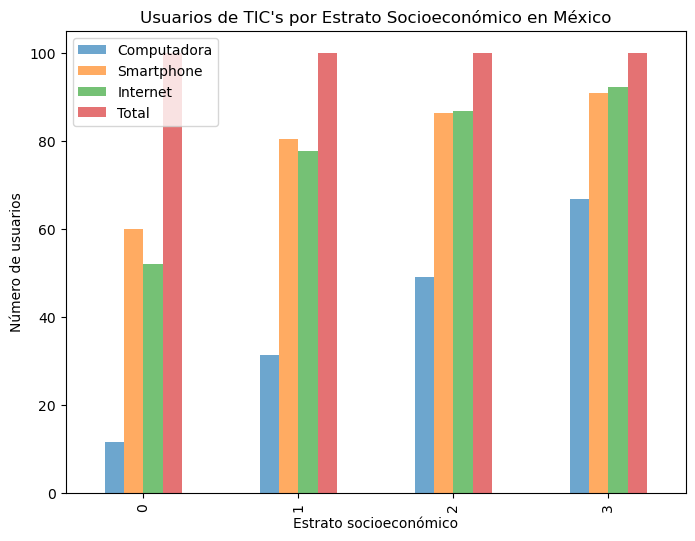

In [26]:
sns.set()
plt.rcParams.update(plt.rcParamsDefault)
Usuarios.plot(kind="bar",
                    alpha=0.65,
                    figsize=(8,6))
plt.title("Usuarios de TIC's por Estrato Socioeconómico en México")
plt.ylabel("Número de usuarios")
plt.xlabel("Estrato socioeconómico")
plt.show()

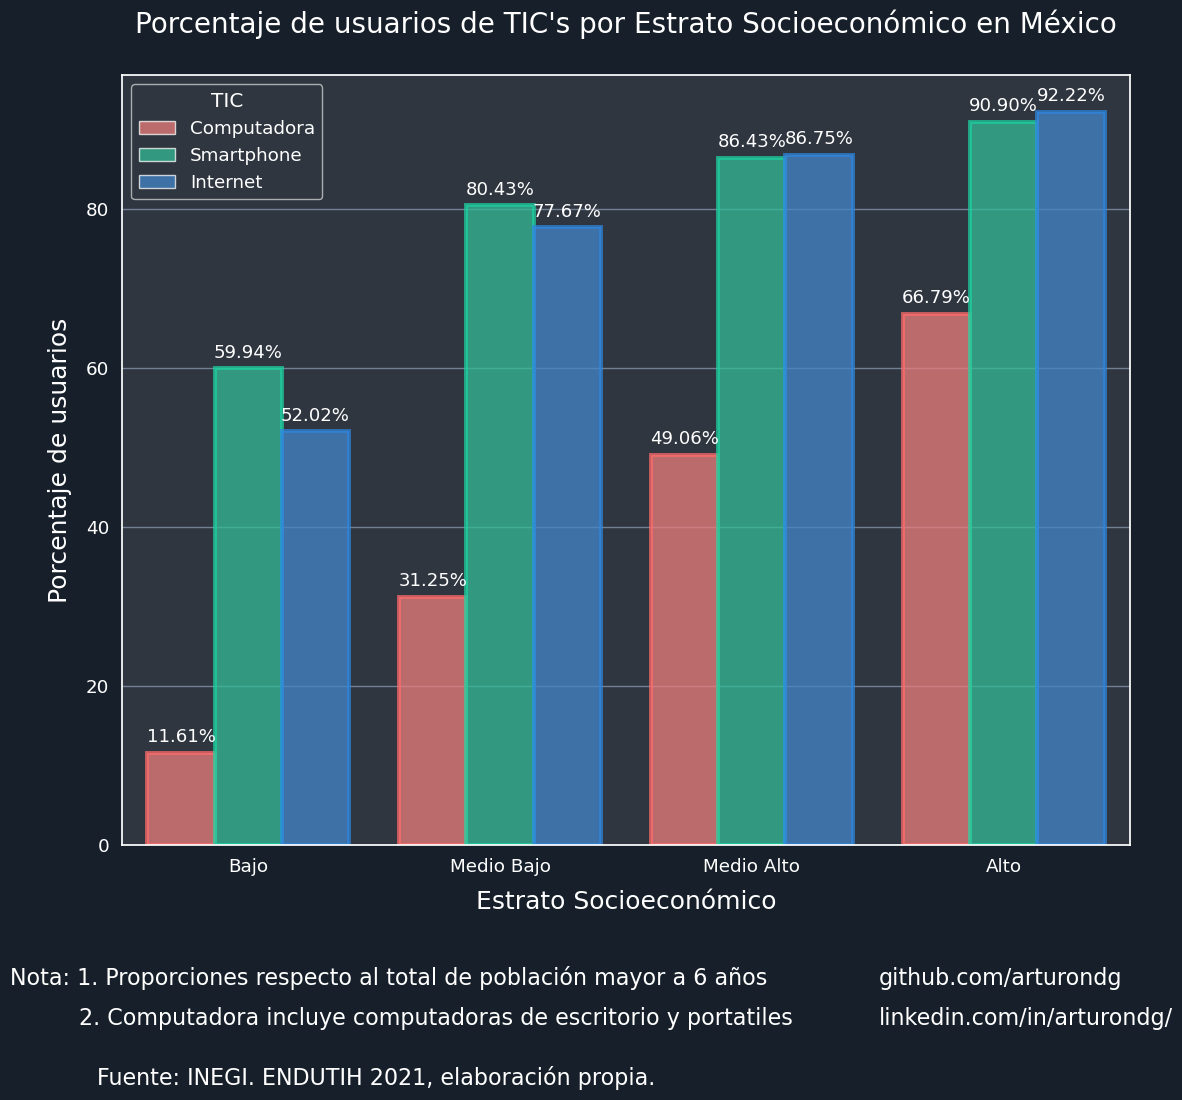

In [97]:
Usuarios_sci = Usuarios.drop("Total", axis=1)
Usuarios_sci = pd.melt(Usuarios_sci, id_vars=['Estrato'], value_vars=['Computadora', 'Smartphone', 'Internet'], var_name='TIC', value_name='Porcentaje')
plt.figure(figsize =(13, 10))
sns.set(font_scale=1.2)
colors = ['#ff6b6b', '#1dd1a1', '#2e86de'] # bar colors
colors2 = ['#ff6b6b','#ff6b6b','#ff6b6b','#ff6b6b', '#1dd1a1', '#1dd1a1','#1dd1a1','#1dd1a1','#2e86de','#2e86de','#2e86de','#2e86de'] #edge colors bar
sns.set_style({"axes.facecolor": "#2f3640", # color plotting area background
                           'axes.edgecolor': 'white', # color edge plotting area
                           'axes.labelcolor': 'white', # color text axes
                           'figure.facecolor': '#17202A', # background color of the figure area
                           'grid.color': '#718093', 
                           'xtick.color' : 'white',
                           'text.color' : 'white',
                           'xtick.color' : 'white',
                           'ytick.color' : 'white'})
ax = sns.barplot(data=Usuarios_sci, x='Estrato', y='Porcentaje', hue='TIC', palette=colors, alpha=0.75)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors2[i % len(colors2)])
    patch.set_linewidth(2.8)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors2[i % len(colors2)])
    patch.set_linewidth(2.8)
    ax.annotate(f"{patch.get_height():.2f}%", 
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', 
                va='bottom', 
                fontsize=13,
                color='white',
                label="Porcentaje")

ax.set_xlabel("Estrato Socioeconómico", fontsize=18, labelpad=10)
ax.set_ylabel("Porcentaje de usuarios", fontsize=18, labelpad=10)
ax.set_title("Porcentaje de usuarios de TIC's por Estrato Socioeconómico en México", fontsize=20, pad=30)

plt.figtext(0.33, -0.03, "Nota: 1. Proporciones respecto al total de población mayor a 6 años",
            ha="center", fontsize=16)

plt.figtext(0.092, -0.07, "2. Computadora incluye computadoras de escritorio y portatiles ",
            ha="left", fontsize=16)

plt.figtext(0.32, -.13, "Fuente: INEGI. ENDUTIH 2021, elaboración propia.",
            ha="center", fontsize=16)
plt.figtext(0.894, -0.03, "github.com/arturondg",
            ha="right", fontsize=16)
plt.figtext(0.82, -0.07, "linkedin.com/in/arturondg/",
            ha="center", fontsize=16)
plt.show()

## Luagares más frecuentes de acceso a una computadora
Si bien hay una clara diferencia entre los usuarios de las computadoras, es preciso observarar dónde es que se frecuenta este uso, y poder visualizarlo por Estrato

In [28]:
df_uso_computadora = df_usuario1[["ESTRATO", "P6_7_1", "P6_7_2", "P6_7_3", "P6_7_4", "P6_7_5", "P6_7_6", "P6_7_7", "FAC_PER"]]
df_uso_computadora

,ESTRATO,P6_7_1,P6_7_2,P6_7_3,P6_7_4,P6_7_5,P6_7_6,P6_7_7,FAC_PER
0,3,1,1,2,2,2,2,2,173
1,3,1,2,2,2,2,2,2,1035
2,3,1,1,2,2,2,2,2,345
3,3,-1,-1,-1,-1,-1,-1,-1,1381
4,3,1,1,2,2,2,2,2,518
...,...,...,...,...,...,...,...,...,...
59280,1,-1,-1,-1,-1,-1,-1,-1,562
59281,1,-1,-1,-1,-1,-1,-1,-1,579
59282,1,-1,-1,-1,-1,-1,-1,-1,562
59283,1,-1,-1,-1,-1,-1,-1,-1,187


In [29]:
columns_uso_computadora = ["ESTRATO", "P6_7_1", "P6_7_2", "P6_7_3", "P6_7_4", "P6_7_5", "P6_7_6", "P6_7_7"]
for column in columns_uso_computadora: 
    print(column)
    print(df_uso_computadora[column].value_counts())


ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P6_7_1
-1    38095
 1    16972
 2     4218
Name: P6_7_1, dtype: int64
P6_7_2
-1    41045
 1     9647
 2     8593
Name: P6_7_2, dtype: int64
P6_7_3
-1    38095
 2    18266
 1     2924
Name: P6_7_3, dtype: int64
P6_7_4
-1    38095
 2    18674
 1     2516
Name: P6_7_4, dtype: int64
P6_7_5
-1    38095
 2    19984
 1     1206
Name: P6_7_5, dtype: int64
P6_7_6
-1    38095
 2    15989
 1     5201
Name: P6_7_6, dtype: int64
P6_7_7
-1    38095
 2    17970
 1     3220
Name: P6_7_7, dtype: int64


In [30]:
columns_uso_computadora_r = ["P6_7_1", "P6_7_2", "P6_7_3", "P6_7_4", "P6_7_5", "P6_7_6", "P6_7_7"]

for column in columns_uso_computadora_r:
    df_uso_computadora.replace({column : [-1, 2]}, 0, inplace=True)

for column in columns_uso_computadora: 
    print(column)
    print(df_uso_computadora[column].value_counts())

ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P6_7_1
0    42313
1    16972
Name: P6_7_1, dtype: int64
P6_7_2
0    49638
1     9647
Name: P6_7_2, dtype: int64
P6_7_3
0    56361
1     2924
Name: P6_7_3, dtype: int64
P6_7_4
0    56769
1     2516
Name: P6_7_4, dtype: int64
P6_7_5
0    58079
1     1206
Name: P6_7_5, dtype: int64
P6_7_6
0    54084
1     5201
Name: P6_7_6, dtype: int64
P6_7_7
0    56065
1     3220
Name: P6_7_7, dtype: int64


/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [31]:
df_uso_computadora.iloc[:,1:8] = df_uso_computadora.iloc[:,1:8].mul(df_uso_computadora["FAC_PER"], axis=0)
df_uso_computadora

/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,ESTRATO,P6_7_1,P6_7_2,P6_7_3,P6_7_4,P6_7_5,P6_7_6,P6_7_7,FAC_PER
0,3,173,173,0,0,0,0,0,173
1,3,1035,0,0,0,0,0,0,1035
2,3,345,345,0,0,0,0,0,345
3,3,0,0,0,0,0,0,0,1381
4,3,518,518,0,0,0,0,0,518
...,...,...,...,...,...,...,...,...,...
59280,1,0,0,0,0,0,0,0,562
59281,1,0,0,0,0,0,0,0,579
59282,1,0,0,0,0,0,0,0,562
59283,1,0,0,0,0,0,0,0,187


Renombrando columnas

In [32]:
df_uso_computadora.rename(columns={"P6_7_1": "Hogar", "P6_7_2": "Trabajo", "P6_7_3": "Escuela o\n institución educativa", "P6_7_4": "Sitio público\n con costo", "P6_7_5": "Sitio público sin costo", "P6_7_6": "Casa de\n otra persona", "P6_7_7": "Cualquier otro\n lugar con Portatil"}, inplace=True)

/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Total de usuarios de computadora para esta estadística

In [33]:
estadística_usuarios_computadora = df_usuario1[["ESTRATO", "P6_1", "FAC_PER"]]
estadística_usuarios_computadora["P6_1"].value_counts()

2    38095
1    21190
Name: P6_1, dtype: int64

In [34]:
estadística_usuarios_computadora.replace({"P6_1" : 2}, 0, inplace=True )
estadística_usuarios_computadora["P6_1"].value_counts()

/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


0    38095
1    21190
Name: P6_1, dtype: int64

In [35]:
estadística_usuarios_computadora["P6_1"] = estadística_usuarios_computadora["P6_1"].mul(estadística_usuarios_computadora["FAC_PER"], axis=0)

/tmp/ipykernel_876/1440155148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estadística_usuarios_computadora["P6_1"] = estadística_usuarios_computadora["P6_1"].mul(estadística_usuarios_computadora["FAC_PER"], axis=0)


Total de usuarios de computadoras

In [36]:
Total_usuarios_comp = estadística_usuarios_computadora["P6_1"].sum()
Total_usuarios_comp

43844751

### Lugares de acceso del Total de usuarios de computadora

Uso general en números totales

In [37]:
Uso_computadora_general = df_uso_computadora.iloc[:, 1:8]
Uso_computadora_general = Uso_computadora_general.sum()
Uso_computadora_general


Hogar                                  35816086
Trabajo                                17936127
Escuela o\n institución educativa       6256423
Sitio público\n con costo               5491772
Sitio público sin costo                 2241878
Casa de\n otra persona                  9779434
Cualquier otro\n lugar con Portatil     5722018
dtype: int64

Porcentaje de respuesta

In [38]:
Uso_computadora_general = Uso_computadora_general.apply(lambda x: (x / Total_usuarios_comp) * 100).round(2)
Uso_computadora_general

Hogar                                  81.69
Trabajo                                40.91
Escuela o\n institución educativa      14.27
Sitio público\n con costo              12.53
Sitio público sin costo                 5.11
Casa de\n otra persona                 22.30
Cualquier otro\n lugar con Portatil    13.05
dtype: float64

#### Graficando resultados

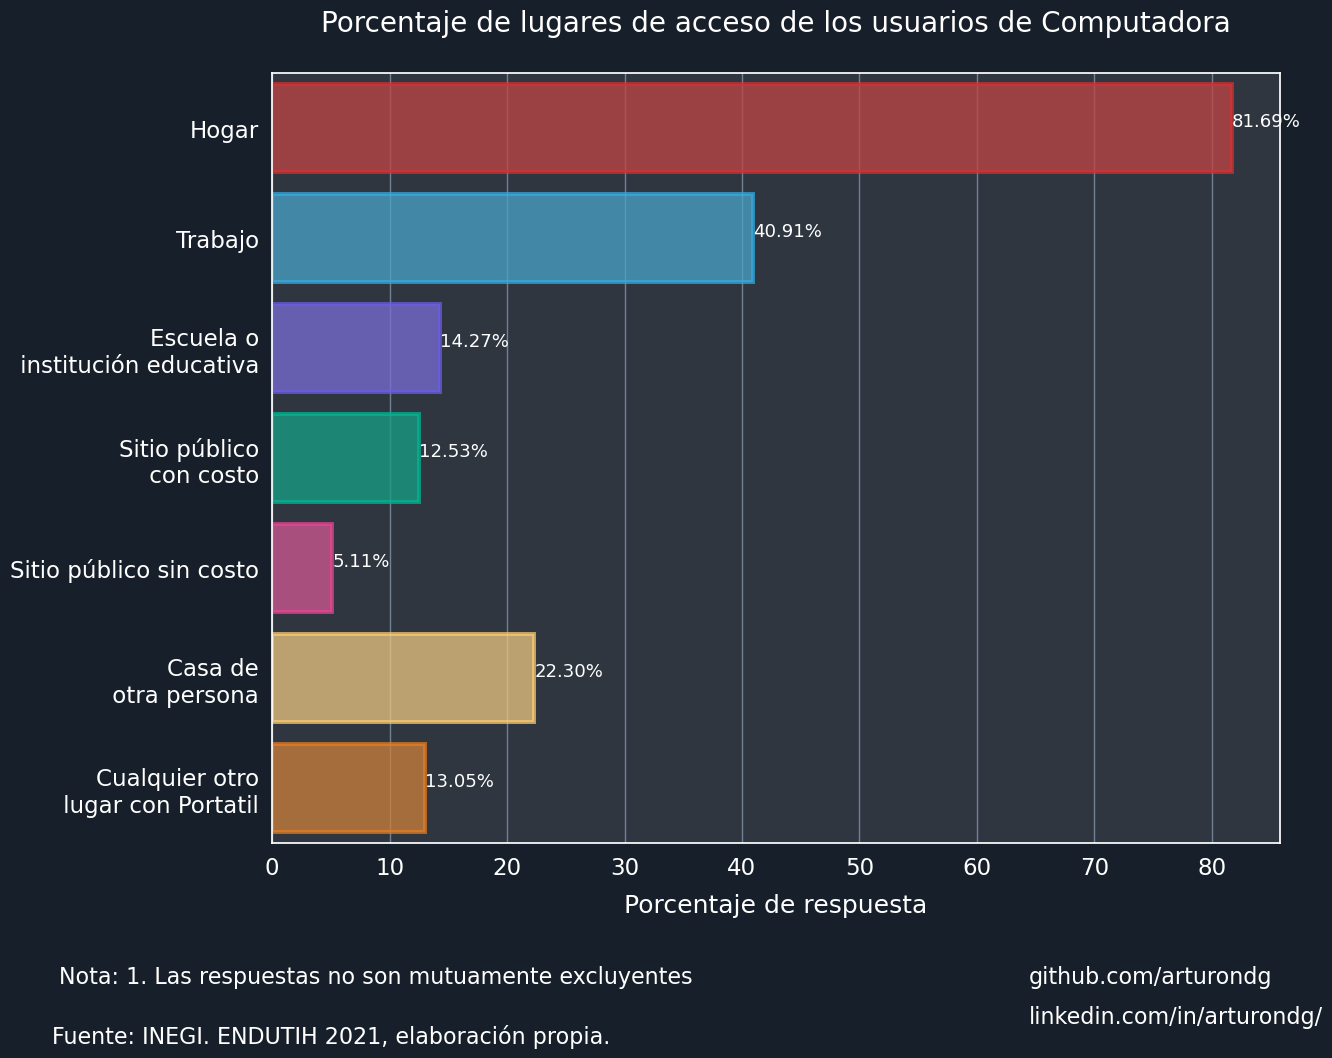

In [39]:
plt.figure(figsize=(13,10))
sns.set(font_scale=1.5)
colors = ["#d63031", "#34ace0", "#6c5ce7", "#00b894", "#e84393", "#fdcb6e", "#e67e22"]

sns.set_style({"axes.facecolor": "#2f3640", # color plotting area background
                           'axes.edgecolor': 'white', # color edge plotting area
                           'axes.labelcolor': 'white', # color text axes
                           'figure.facecolor': '#17202A', # background color of the figure area
                           'grid.color': '#718093', 
                           'xtick.color' : 'white',
                           'text.color' : 'white',
                           'xtick.color' : 'white',
                           'ytick.color' : 'white'})

ax = sns.barplot(y=Uso_computadora_general.index, x=Uso_computadora_general.values, palette=colors, alpha=0.75)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(2.8)

for i, patch in enumerate(ax.patches):
    ax.annotate(f"{patch.get_width():.2f}%", 
                xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=13,
                color='white',
                label=Uso_computadora_general.values)
    
ax.set_xlabel("Porcentaje de respuesta", fontsize=18, labelpad=10)
ax.set_ylabel('')
ax.set_title("Porcentaje de lugares de acceso de los usuarios de Computadora", fontsize=20, pad=30)    

plt.figtext(0.205, -0.03, "Nota: 1. Las respuestas no son mutuamente excluyentes",
            ha="center", fontsize=16)

plt.figtext(0.17, -.09, "Fuente: INEGI. ENDUTIH 2021, elaboración propia.",
            ha="center", fontsize=16)
plt.figtext(0.894, -0.03, "github.com/arturondg",
            ha="right", fontsize=16)
plt.figtext(0.82, -0.07, "linkedin.com/in/arturondg/",
            ha="center", fontsize=16)

plt.show()


### Lugares de acceso de los usuarios de computadora del estrato socioeconómico Alto

In [40]:
df_computadora_alto = df_uso_computadora[df_uso_computadora["ESTRATO"] == 4]
df_computadora_alto.shape


(4996, 9)

Variable para el total de usuarios de ese estrato

In [41]:
estadística_usuarios_computadora_alto = estadística_usuarios_computadora[estadística_usuarios_computadora["ESTRATO"] == 4]
Total_usuarios_comp_alto = estadística_usuarios_computadora_alto["P6_1"].sum()
Total_usuarios_comp_alto

7515661

Visualizando totales por lugar

In [42]:
Uso_computadora_alto = df_computadora_alto.iloc[:, 1:8]
Uso_computadora_alto = Uso_computadora_alto.sum()
Uso_computadora_alto

Hogar                                  6667059
Trabajo                                3843708
Escuela o\n institución educativa      1097664
Sitio público\n con costo               486042
Sitio público sin costo                 418463
Casa de\n otra persona                 1722559
Cualquier otro\n lugar con Portatil    1302348
dtype: int64

Porcentajes

In [43]:
Uso_computadora_alto = Uso_computadora_alto.apply(lambda x: (x / Total_usuarios_comp_alto) * 100).round(2)
Uso_computadora_alto

Hogar                                  88.71
Trabajo                                51.14
Escuela o\n institución educativa      14.61
Sitio público\n con costo               6.47
Sitio público sin costo                 5.57
Casa de\n otra persona                 22.92
Cualquier otro\n lugar con Portatil    17.33
dtype: float64

#### Graficando resultados

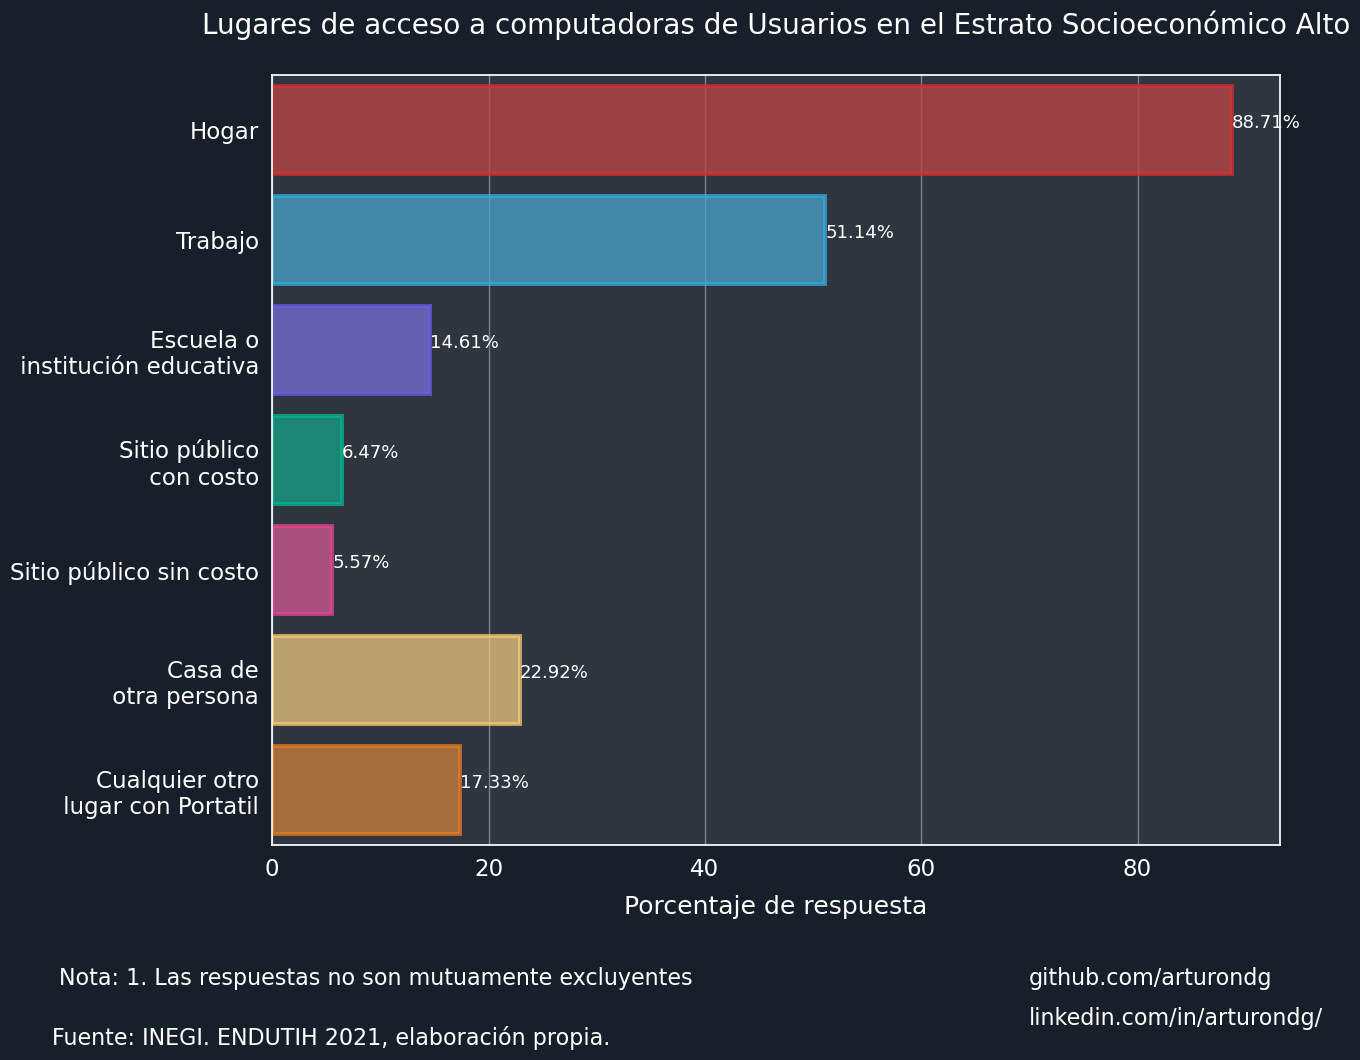

In [44]:
plt.figure(figsize=(13,10))
sns.set(font_scale=1.5)
colors = ["#d63031", "#34ace0", "#6c5ce7", "#00b894", "#e84393", "#fdcb6e", "#e67e22"]

sns.set_style({"axes.facecolor": "#2f3640", # color plotting area background
                           'axes.edgecolor': 'white', # color edge plotting area
                           'axes.labelcolor': 'white', # color text axes
                           'figure.facecolor': '#17202A', # background color of the figure area
                           'grid.color': '#718093', 
                           'xtick.color' : 'white',
                           'text.color' : 'white',
                           'xtick.color' : 'white',
                           'ytick.color' : 'white'})

ax = sns.barplot(y=Uso_computadora_alto.index, x=Uso_computadora_alto.values, palette=colors, alpha=0.75)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(2.8)

for i, patch in enumerate(ax.patches):
    ax.annotate(f"{patch.get_width():.2f}%", 
                xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=13,
                color='white',
                label=Uso_computadora_alto.values)
    
ax.set_xlabel("Porcentaje de respuesta", fontsize=18, labelpad=10)
ax.set_ylabel('')
ax.set_title("Lugares de acceso a computadoras de Usuarios en el Estrato Socioeconómico Alto", fontsize=20, pad=30)    

plt.figtext(0.205, -0.03, "Nota: 1. Las respuestas no son mutuamente excluyentes",
            ha="center", fontsize=16)

plt.figtext(0.17, -.09, "Fuente: INEGI. ENDUTIH 2021, elaboración propia.",
            ha="center", fontsize=16)
plt.figtext(0.894, -0.03, "github.com/arturondg",
            ha="right", fontsize=16)
plt.figtext(0.82, -0.07, "linkedin.com/in/arturondg/",
            ha="center", fontsize=16)

plt.show()


### Lugares de acceso de los usuarios de computadora del estrato socioeconómico Medio Alto

In [45]:
df_computadora_medioalto = df_uso_computadora[df_uso_computadora["ESTRATO"] == 3]
df_computadora_medioalto.shape

(12401, 9)

Variable para el total de usuarios de ese estrato

In [46]:
estadística_usuarios_computadora_medioalto = estadística_usuarios_computadora[estadística_usuarios_computadora["ESTRATO"] == 3]
Total_usuarios_comp_medioalto = estadística_usuarios_computadora_medioalto["P6_1"].sum()
Total_usuarios_comp_medioalto

12316127

Visualizando totales

In [47]:
Uso_computadora_medioalto = df_computadora_medioalto.iloc[:, 1:8]
Uso_computadora_medioalto = Uso_computadora_medioalto.sum()
Uso_computadora_medioalto

Hogar                                  10450359
Trabajo                                 5609539
Escuela o\n institución educativa       1743718
Sitio público\n con costo               1136071
Sitio público sin costo                  665867
Casa de\n otra persona                  2571559
Cualquier otro\n lugar con Portatil     1632231
dtype: int64

Porcentajes

In [48]:
Uso_computadora_medioalto = Uso_computadora_medioalto.apply(lambda x: (x / Total_usuarios_comp_medioalto) * 100).round(2)
Uso_computadora_medioalto

Hogar                                  84.85
Trabajo                                45.55
Escuela o\n institución educativa      14.16
Sitio público\n con costo               9.22
Sitio público sin costo                 5.41
Casa de\n otra persona                 20.88
Cualquier otro\n lugar con Portatil    13.25
dtype: float64

#### Graficando resultados

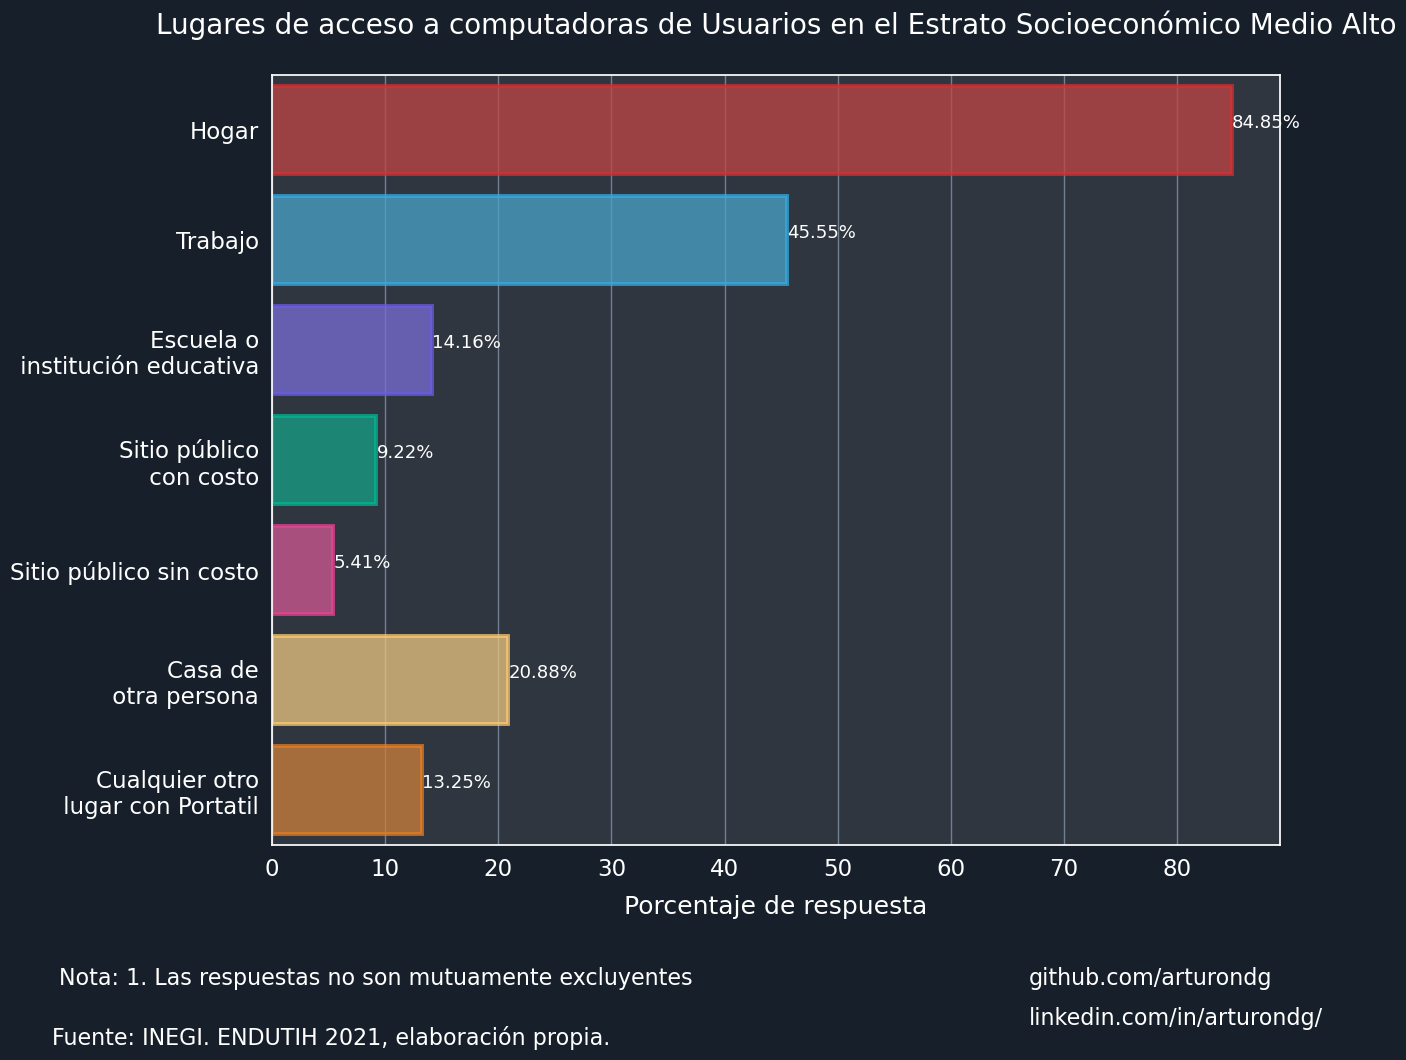

In [49]:
plt.figure(figsize=(13,10))
sns.set(font_scale=1.5)
colors = ["#d63031", "#34ace0", "#6c5ce7", "#00b894", "#e84393", "#fdcb6e", "#e67e22"]

sns.set_style({"axes.facecolor": "#2f3640", # color plotting area background
                           'axes.edgecolor': 'white', # color edge plotting area
                           'axes.labelcolor': 'white', # color text axes
                           'figure.facecolor': '#17202A', # background color of the figure area
                           'grid.color': '#718093', 
                           'xtick.color' : 'white',
                           'text.color' : 'white',
                           'xtick.color' : 'white',
                           'ytick.color' : 'white'})

ax = sns.barplot(y=Uso_computadora_medioalto.index, x=Uso_computadora_medioalto.values, palette=colors, alpha=0.75)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(2.8)

for i, patch in enumerate(ax.patches):
    ax.annotate(f"{patch.get_width():.2f}%", 
                xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=13,
                color='white',
                label=Uso_computadora_medioalto.values)
    
ax.set_xlabel("Porcentaje de respuesta", fontsize=18, labelpad=10)
ax.set_ylabel('')
ax.set_title("Lugares de acceso a computadoras de Usuarios en el Estrato Socioeconómico Medio Alto", fontsize=20, pad=30)    

plt.figtext(0.205, -0.03, "Nota: 1. Las respuestas no son mutuamente excluyentes",
            ha="center", fontsize=16)

plt.figtext(0.17, -.09, "Fuente: INEGI. ENDUTIH 2021, elaboración propia.",
            ha="center", fontsize=16)
plt.figtext(0.894, -0.03, "github.com/arturondg",
            ha="right", fontsize=16)
plt.figtext(0.82, -0.07, "linkedin.com/in/arturondg/",
            ha="center", fontsize=16)

plt.show()

### Lugares de acceso de los usuarios de computadora del estrato socioeconómico Medio Bajo

In [50]:
df_computadora_mediobajo = df_uso_computadora[df_uso_computadora["ESTRATO"] == 2]
df_computadora_mediobajo.shape

(30686, 9)

Variables para el total de usuario de este estrato

In [51]:
estadística_usuarios_computadora_mediobajo = estadística_usuarios_computadora[estadística_usuarios_computadora["ESTRATO"] == 2]
Total_usuarios_comp_mediobajo = estadística_usuarios_computadora_mediobajo["P6_1"].sum()
Total_usuarios_comp_mediobajo

20830949

Visualizando totales

In [52]:
Uso_computadora_mediobajo = df_computadora_mediobajo.iloc[:, 1:8]
Uso_computadora_mediobajo = Uso_computadora_mediobajo.sum()
Uso_computadora_mediobajo

Hogar                                  16487270
Trabajo                                 7692001
Escuela o\n institución educativa       2868750
Sitio público\n con costo               3077082
Sitio público sin costo                 1004223
Casa de\n otra persona                  4747878
Cualquier otro\n lugar con Portatil     2447824
dtype: int64

Porcentajes

In [53]:
Uso_computadora_mediobajo = Uso_computadora_mediobajo.apply(lambda x: (x / Total_usuarios_comp_mediobajo) * 100).round(2)
Uso_computadora_mediobajo

Hogar                                  79.15
Trabajo                                36.93
Escuela o\n institución educativa      13.77
Sitio público\n con costo              14.77
Sitio público sin costo                 4.82
Casa de\n otra persona                 22.79
Cualquier otro\n lugar con Portatil    11.75
dtype: float64

#### Graficando resultados

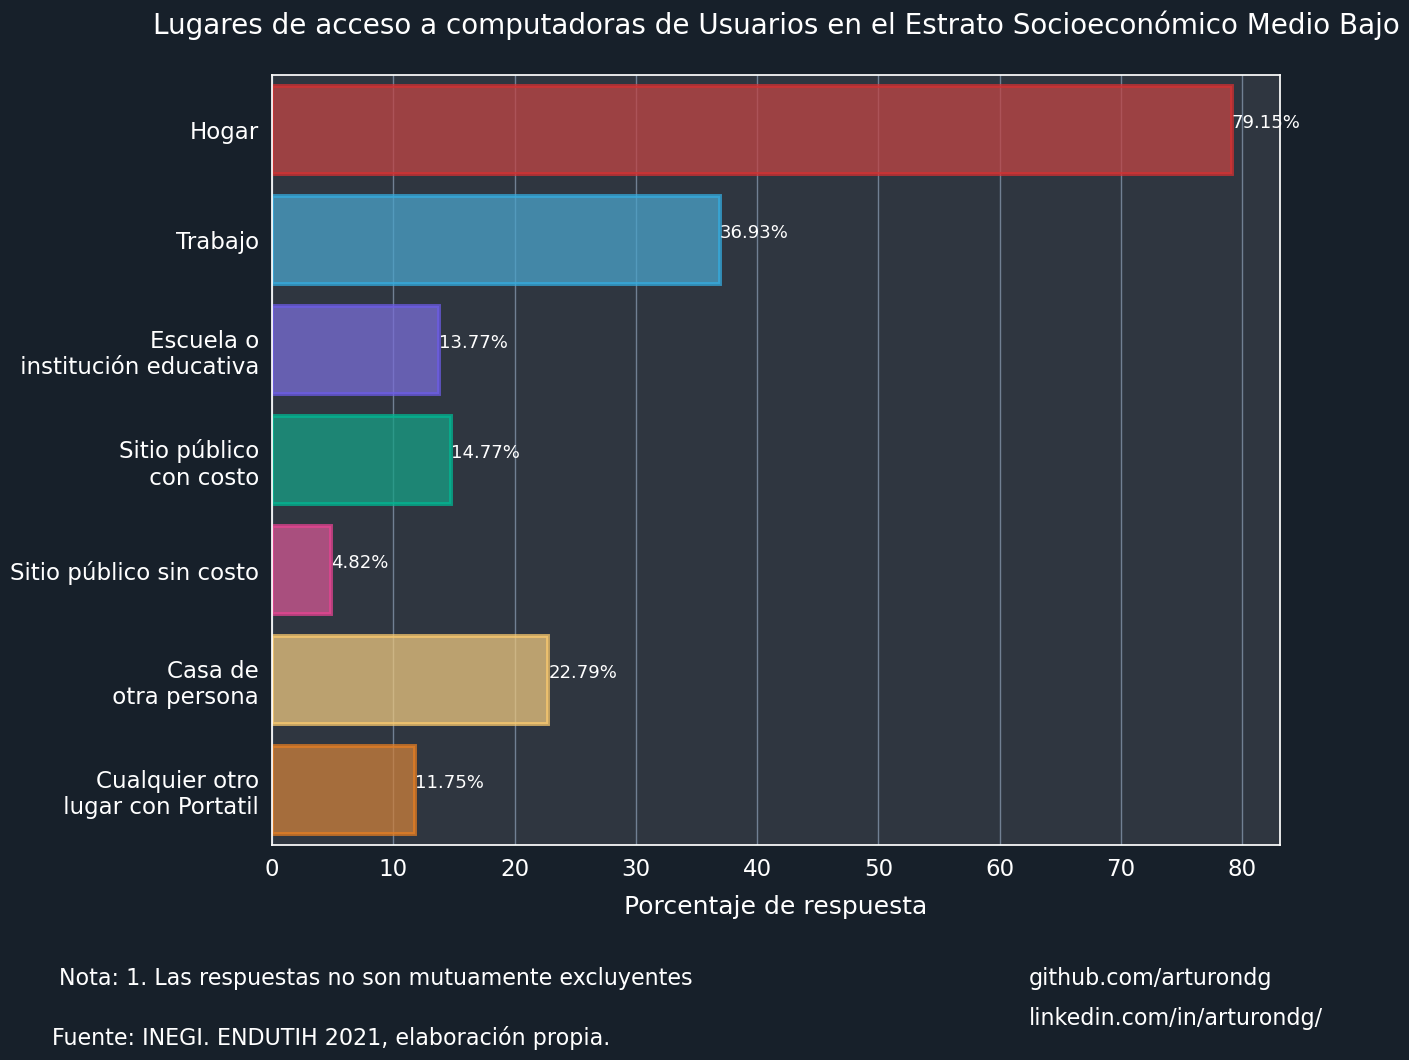

In [54]:
plt.figure(figsize=(13,10))
sns.set(font_scale=1.5)
colors = ["#d63031", "#34ace0", "#6c5ce7", "#00b894", "#e84393", "#fdcb6e", "#e67e22"]

sns.set_style({"axes.facecolor": "#2f3640", # color plotting area background
                           'axes.edgecolor': 'white', # color edge plotting area
                           'axes.labelcolor': 'white', # color text axes
                           'figure.facecolor': '#17202A', # background color of the figure area
                           'grid.color': '#718093', 
                           'xtick.color' : 'white',
                           'text.color' : 'white',
                           'xtick.color' : 'white',
                           'ytick.color' : 'white'})

ax = sns.barplot(y=Uso_computadora_mediobajo.index, x=Uso_computadora_mediobajo.values, palette=colors, alpha=0.75)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(2.8)

for i, patch in enumerate(ax.patches):
    ax.annotate(f"{patch.get_width():.2f}%", 
                xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=13,
                color='white',
                label=Uso_computadora_mediobajo.values)
    
ax.set_xlabel("Porcentaje de respuesta", fontsize=18, labelpad=10)
ax.set_ylabel('')
ax.set_title("Lugares de acceso a computadoras de Usuarios en el Estrato Socioeconómico Medio Bajo", fontsize=20, pad=30)    

plt.figtext(0.205, -0.03, "Nota: 1. Las respuestas no son mutuamente excluyentes",
            ha="center", fontsize=16)

plt.figtext(0.17, -.09, "Fuente: INEGI. ENDUTIH 2021, elaboración propia.",
            ha="center", fontsize=16)
plt.figtext(0.894, -0.03, "github.com/arturondg",
            ha="right", fontsize=16)
plt.figtext(0.82, -0.07, "linkedin.com/in/arturondg/",
            ha="center", fontsize=16)

plt.show()

### Lugares de acceso de los usuarios de computadora del estrato socioeconómico Bajo

In [55]:
df_computadora_bajo = df_uso_computadora[df_uso_computadora["ESTRATO"] == 1]
df_computadora_bajo.shape

(11202, 9)

Variables para el total de usuario de este estrato

In [56]:
estadística_usuarios_computadora_bajo = estadística_usuarios_computadora[estadística_usuarios_computadora["ESTRATO"] == 1]
Total_usuarios_comp_bajo = estadística_usuarios_computadora_bajo["P6_1"].sum()
Total_usuarios_comp_bajo

3182014

Visualizando totales

In [57]:
Uso_computadora_bajo = df_computadora_bajo.iloc[:, 1:8]
Uso_computadora_bajo = Uso_computadora_bajo.sum()
Uso_computadora_bajo

Hogar                                  2211398
Trabajo                                 790879
Escuela o\n institución educativa       546291
Sitio público\n con costo               792577
Sitio público sin costo                 153325
Casa de\n otra persona                  737438
Cualquier otro\n lugar con Portatil     339615
dtype: int64

Porcentajes

In [58]:
Uso_computadora_bajo = Uso_computadora_bajo.apply(lambda x: (x / Total_usuarios_comp_bajo) * 100).round(2)
Uso_computadora_bajo

Hogar                                  69.50
Trabajo                                24.85
Escuela o\n institución educativa      17.17
Sitio público\n con costo              24.91
Sitio público sin costo                 4.82
Casa de\n otra persona                 23.18
Cualquier otro\n lugar con Portatil    10.67
dtype: float64

Graficando resultados

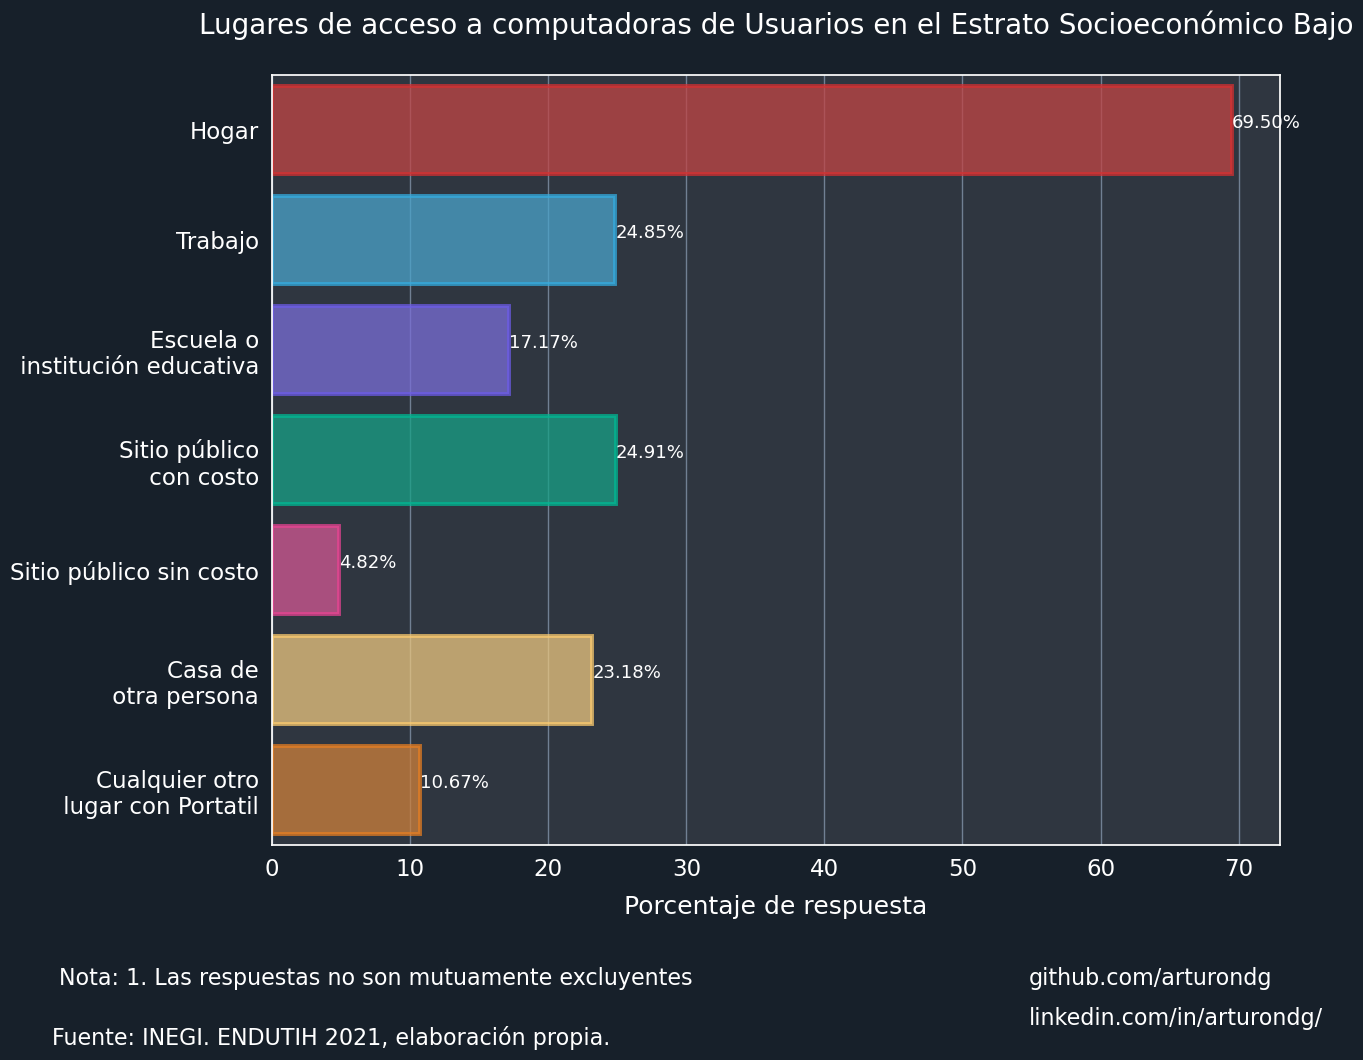

In [59]:
plt.figure(figsize=(13,10))
sns.set(font_scale=1.5)
colors = ["#d63031", "#34ace0", "#6c5ce7", "#00b894", "#e84393", "#fdcb6e", "#e67e22"]

sns.set_style({"axes.facecolor": "#2f3640", # color plotting area background
                           'axes.edgecolor': 'white', # color edge plotting area
                           'axes.labelcolor': 'white', # color text axes
                           'figure.facecolor': '#17202A', # background color of the figure area
                           'grid.color': '#718093', 
                           'xtick.color' : 'white',
                           'text.color' : 'white',
                           'xtick.color' : 'white',
                           'ytick.color' : 'white'})

ax = sns.barplot(y=Uso_computadora_bajo.index, x=Uso_computadora_bajo.values, palette=colors, alpha=0.75)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(2.8)

for i, patch in enumerate(ax.patches):
    ax.annotate(f"{patch.get_width():.2f}%", 
                xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=13,
                color='white',
                label=Uso_computadora_bajo.values)
    
ax.set_xlabel("Porcentaje de respuesta", fontsize=18, labelpad=10)
ax.set_ylabel('')
ax.set_title("Lugares de acceso a computadoras de Usuarios en el Estrato Socioeconómico Bajo", fontsize=20, pad=30)    

plt.figtext(0.205, -0.03, "Nota: 1. Las respuestas no son mutuamente excluyentes",
            ha="center", fontsize=16)

plt.figtext(0.17, -.09, "Fuente: INEGI. ENDUTIH 2021, elaboración propia.",
            ha="center", fontsize=16)
plt.figtext(0.894, -0.03, "github.com/arturondg",
            ha="right", fontsize=16)
plt.figtext(0.82, -0.07, "linkedin.com/in/arturondg/",
            ha="center", fontsize=16)

plt.show()

## Desde dónde hay conexión a internet

Tomando en cuenta que los usuarios de internet crecen, con respecto al acceso en los hogares, se visará de dónde es que tiene acceso los usuarios.

### Preparando Dataframe

In [60]:
df_uso_internet = df_usuario1[["ESTRATO", "P7_7_1", "P7_7_2", "P7_7_3", "P7_7_4", "P7_7_5", "P7_7_6", "P7_7_7", "FAC_PER"]]
df_uso_internet

,ESTRATO,P7_7_1,P7_7_2,P7_7_3,P7_7_4,P7_7_5,P7_7_6,P7_7_7,FAC_PER
0,3,1,1,2,2,2,1,1,173
1,3,1,1,2,1,1,1,1,1035
2,3,1,1,2,2,2,1,1,345
3,3,1,2,2,2,2,1,1,1381
4,3,1,1,2,2,2,1,1,518
...,...,...,...,...,...,...,...,...,...
59280,1,1,-1,2,2,1,2,1,562
59281,1,-1,-1,-1,-1,-1,-1,-1,579
59282,1,-1,-1,-1,-1,-1,-1,-1,562
59283,1,-1,-1,-1,-1,-1,-1,-1,187


Valores encontrados en las variables de interés

In [61]:
columns_uso_internet = ["ESTRATO", "P7_7_1", "P7_7_2", "P7_7_3", "P7_7_4", "P7_7_5", "P7_7_6", "P7_7_7"]
for column in columns_uso_internet: 
    print(column)
    print(df_uso_internet[column].value_counts())

ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P7_7_1
 1    40917
-1    16139
 2     2229
Name: P7_7_1, dtype: int64
P7_7_2
-1    22271
 2    18828
 1    18186
Name: P7_7_2, dtype: int64
P7_7_3
 2    37201
-1    16139
 1     5945
Name: P7_7_3, dtype: int64
P7_7_4
 2    35899
-1    16139
 1     7247
Name: P7_7_4, dtype: int64
P7_7_5
 2    36379
-1    16139
 1     6767
Name: P7_7_5, dtype: int64
P7_7_6
 2    22782
 1    20364
-1    16139
Name: P7_7_6, dtype: int64
P7_7_7
 1    24865
 2    18281
-1    16139
Name: P7_7_7, dtype: int64


Reemplazando valores

In [62]:
columns_uso_internet_r = ["P7_7_1", "P7_7_2", "P7_7_3", "P7_7_4", "P7_7_5", "P7_7_6", "P7_7_7"]

for column in columns_uso_internet_r:
    df_uso_internet.replace({column : [-1, 2]}, 0, inplace=True)

for column in columns_uso_internet: 
    print(column)
    print(df_uso_internet[column].value_counts())

ESTRATO
2    30686
3    12401
1    11202
4     4996
Name: ESTRATO, dtype: int64
P7_7_1
1    40917
0    18368
Name: P7_7_1, dtype: int64
P7_7_2
0    41099
1    18186
Name: P7_7_2, dtype: int64
P7_7_3
0    53340
1     5945
Name: P7_7_3, dtype: int64
P7_7_4
0    52038
1     7247
Name: P7_7_4, dtype: int64
P7_7_5
0    52518
1     6767
Name: P7_7_5, dtype: int64
P7_7_6
0    38921
1    20364
Name: P7_7_6, dtype: int64
P7_7_7
0    34420
1    24865
Name: P7_7_7, dtype: int64


/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [63]:
df_uso_internet.iloc[:,1:8] = df_uso_internet.iloc[:,1:8].mul(df_uso_internet["FAC_PER"], axis=0)
df_uso_internet

/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,ESTRATO,P7_7_1,P7_7_2,P7_7_3,P7_7_4,P7_7_5,P7_7_6,P7_7_7,FAC_PER
0,3,173,173,0,0,0,173,173,173
1,3,1035,1035,0,1035,1035,1035,1035,1035
2,3,345,345,0,0,0,345,345,345
3,3,1381,0,0,0,0,1381,1381,1381
4,3,518,518,0,0,0,518,518,518
...,...,...,...,...,...,...,...,...,...
59280,1,562,0,0,0,562,0,562,562
59281,1,0,0,0,0,0,0,0,579
59282,1,0,0,0,0,0,0,0,562
59283,1,0,0,0,0,0,0,0,187


Renombrando columnas

In [64]:
df_uso_internet.rename(columns={"P7_7_1": "Hogar", "P7_7_2": "Trabajo", "P7_7_3": "Escuela o\n institución educativa", "P7_7_4": "Sitio público\n con costo", "P7_7_5": "Sitio público sin costo", "P7_7_6": "Casa de\n otra persona", "P7_7_7": "Cualquier lugar\n mediante conexión móvil"}, inplace=True)
df_uso_internet

/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ESTRATO,Hogar,Trabajo,Escuela o\n institución educativa,Sitio público\n con costo,Sitio público sin costo,Casa de\n otra persona,Cualquier lugar\n mediante conexión móvil,FAC_PER
0,3,173,173,0,0,0,173,173,173
1,3,1035,1035,0,1035,1035,1035,1035,1035
2,3,345,345,0,0,0,345,345,345
3,3,1381,0,0,0,0,1381,1381,1381
4,3,518,518,0,0,0,518,518,518
...,...,...,...,...,...,...,...,...,...
59280,1,562,0,0,0,562,0,562,562
59281,1,0,0,0,0,0,0,0,579
59282,1,0,0,0,0,0,0,0,562
59283,1,0,0,0,0,0,0,0,187


In [65]:
estadística_usuarios_internet = df_usuario1[["ESTRATO", "P7_1", "FAC_PER"]]
estadística_usuarios_internet["P7_1"].value_counts()

1    43146
2    16139
Name: P7_1, dtype: int64

In [66]:
estadística_usuarios_internet.replace({"P7_1" : 2}, 0, inplace=True )
estadística_usuarios_internet["P7_1"].value_counts()

/home/arturo/anaconda3/envs/brechaea/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


1    43146
0    16139
Name: P7_1, dtype: int64

In [67]:
estadística_usuarios_internet["P7_1"] = estadística_usuarios_internet["P7_1"].mul(estadística_usuarios_internet["FAC_PER"], axis=0)

/tmp/ipykernel_876/1110714675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estadística_usuarios_internet["P7_1"] = estadística_usuarios_internet["P7_1"].mul(estadística_usuarios_internet["FAC_PER"], axis=0)


Total de usuarios de internet

In [68]:
Total_usuarios_inter = estadística_usuarios_internet["P7_1"].sum()
Total_usuarios_inter

88562249

### Lugares de acceso del Total de usuarios de internet
Uso general en número totales

In [69]:
Uso_internet_general = df_uso_internet.iloc[:, 1:8]
Uso_internet_general = Uso_internet_general.sum()
Uso_internet_general

Hogar                                        84350593
Trabajo                                      34167868
Escuela o\n institución educativa            12448085
Sitio público\n con costo                    14863269
Sitio público sin costo                      12742111
Casa de\n otra persona                       38930494
Cualquier lugar\n mediante conexión móvil    48897634
dtype: int64

Porcentajes

In [70]:
Uso_internet_general = Uso_internet_general.apply(lambda x:(x/ Total_usuarios_inter)* 100).round(2)
Uso_internet_general

Hogar                                        95.24
Trabajo                                      38.58
Escuela o\n institución educativa            14.06
Sitio público\n con costo                    16.78
Sitio público sin costo                      14.39
Casa de\n otra persona                       43.96
Cualquier lugar\n mediante conexión móvil    55.21
dtype: float64

Graficando resultados

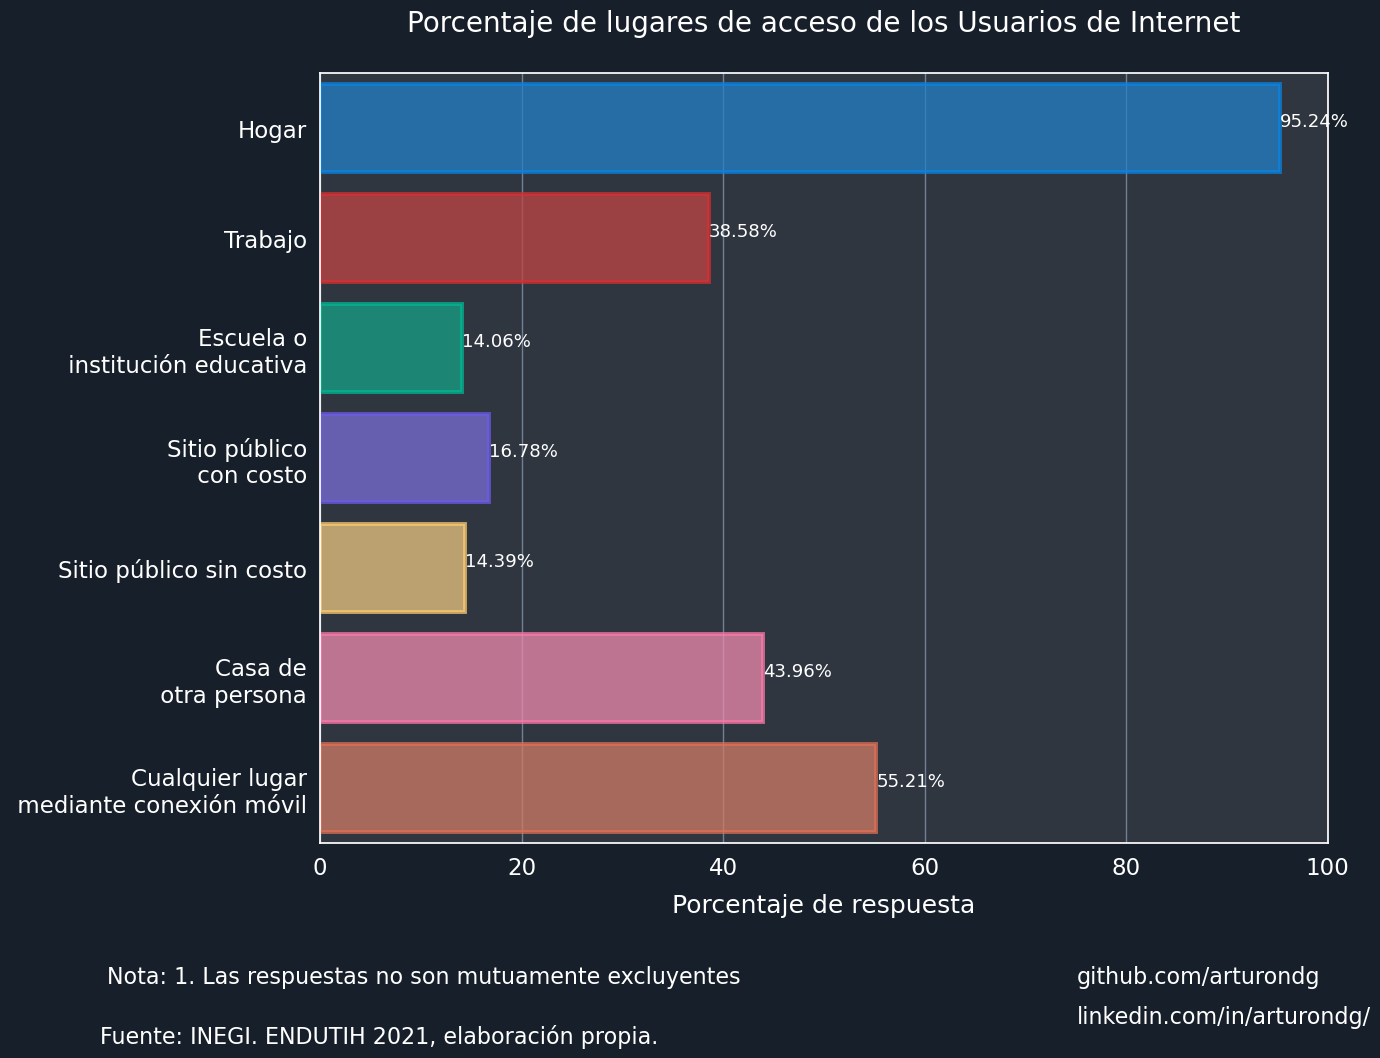

In [71]:
plt.figure(figsize=(13,10))
sns.set(font_scale=1.5)
colors = ["#0984e3", "#d63031", "#00b894", "#6c5ce7", "#fdcb6e", "#fd79a8", "#e17055"]

sns.set_style({"axes.facecolor": "#2f3640", # color plotting area background
                           'axes.edgecolor': 'white', # color edge plotting area
                           'axes.labelcolor': 'white', # color text axes
                           'figure.facecolor': '#17202A', # background color of the figure area
                           'grid.color': '#718093', 
                           'xtick.color' : 'white',
                           'text.color' : 'white',
                           'xtick.color' : 'white',
                           'ytick.color' : 'white'})

ax = sns.barplot(y=Uso_internet_general.index, x=Uso_internet_general.values, palette=colors, alpha=0.75)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(2.8)

for i, patch in enumerate(ax.patches):
    ax.annotate(f"{patch.get_width():.2f}%", 
                xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=13,
                color='white',
                label=Uso_internet_general.values)
    
ax.set_xlabel("Porcentaje de respuesta", fontsize=18, labelpad=10)
ax.set_ylabel('')
ax.set_title("Porcentaje de lugares de acceso de los Usuarios de Internet", fontsize=20, pad=30)    

plt.figtext(0.205, -0.03, "Nota: 1. Las respuestas no son mutuamente excluyentes",
            ha="center", fontsize=16)

plt.figtext(0.17, -.09, "Fuente: INEGI. ENDUTIH 2021, elaboración propia.",
            ha="center", fontsize=16)
plt.figtext(0.894, -0.03, "github.com/arturondg",
            ha="right", fontsize=16)
plt.figtext(0.82, -0.07, "linkedin.com/in/arturondg/",
            ha="center", fontsize=16)

plt.show()


### Definiendo funciones para el proceso análisis y graficación
Debido a que el proceso será similar al anterior, definiré funciones para cada tarea

Función para filtrar el dataframe por medio del Estrato Sicioeconómico

In [72]:
def filtrando_estrato(estrato):
    df_internet = df_uso_internet[df_uso_internet["ESTRATO"] == estrato]
    return df_internet

Función para obtener el Total de usuarios de internet por estrato socioeconómico

In [73]:
def total_estrato(estrato):
    estadística_usuarios_internet_estrato = estadística_usuarios_internet[estadística_usuarios_internet["ESTRATO"] == estrato]
    total_usuarios_internet_estrato = estadística_usuarios_internet_estrato["P7_1"].sum()
    return total_usuarios_internet_estrato

Función para obtener los totales de de respuesta ponderada

In [74]:
def visulizar_totales(df_estrato):
    uso_internet_estrato = df_estrato.iloc[:,1:8]
    uso_internet_estrato = uso_internet_estrato.sum()
    return uso_internet_estrato


Función para obtener porcentajes a partir del total de usuarios del mismo estrato

In [75]:
def porcentajes(totales, total_estrato):
    porcentaje_estrato = totales.apply(lambda x:(x/ total_estrato) * 100).round(2)
    return porcentaje_estrato

Función para graficar los resultados

In [76]:
def gráficar_resultados(internet_estrato, estrato):
    plt.figure(figsize=(13,10))
    sns.set(font_scale=1.5)
    colors = ["#0984e3", "#d63031", "#00b894", "#6c5ce7", "#fdcb6e", "#fd79a8", "#e17055"]

    sns.set_style({"axes.facecolor": "#2f3640", # color plotting area background
                            'axes.edgecolor': 'white', # color edge plotting area
                            'axes.labelcolor': 'white', # color text axes
                            'figure.facecolor': '#17202A', # background color of the figure area
                            'grid.color': '#718093', 
                            'xtick.color' : 'white',
                            'text.color' : 'white',
                            'xtick.color' : 'white',
                            'ytick.color' : 'white'})

    ax = sns.barplot(y=internet_estrato.index, x=internet_estrato.values, palette=colors, alpha=0.75)

    for i, patch in enumerate(ax.patches):
        patch.set_edgecolor(colors[i % len(colors)])
        patch.set_linewidth(2.8)

    for i, patch in enumerate(ax.patches):
        ax.annotate(f"{patch.get_width():.2f}%", 
                    xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2), 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    ha='left', 
                    va='center', 
                    fontsize=13,
                    color='white',
                    label=internet_estrato.values)
        
    ax.set_xlabel("Porcentaje de respuesta", fontsize=18, labelpad=10)
    ax.set_ylabel('')
    ax.set_title("Lugares de acceso a Internet de Usuarios en el Estrato Socioeconómico " + estrato, fontsize=20, pad=30)    

    plt.figtext(0.205, -0.03, "Nota: 1. Las respuestas no son mutuamente excluyentes",
                ha="center", fontsize=16)

    plt.figtext(0.17, -.09, "Fuente: INEGI. ENDUTIH 2021, elaboración propia.",
                ha="center", fontsize=16)
    plt.figtext(0.894, -0.03, "github.com/arturondg",
                ha="right", fontsize=16)
    plt.figtext(0.82, -0.07, "linkedin.com/in/arturondg/",
                ha="center", fontsize=16)

    plt.show()

### Lugares de acceso de los usuarios de Internet del estrato socioeconómico Alto

Filtrar dataframe por el estrato alto, el cuál su valor es 4

In [77]:
df_internet_alto = filtrando_estrato(4)
df_internet_alto.shape

(4996, 9)

Obtener el total de usuarios de Internet del Estrato Alto

In [78]:
Total_usuarios_inter_alto = total_estrato(4)
Total_usuarios_inter_alto

9736169

Visualización de respuestas totales ponderadas

In [79]:
Uso_internet_alto = visulizar_totales(df_internet_alto)
Uso_internet_alto

Hogar                                        9623651
Trabajo                                      5066661
Escuela o\n institución educativa            1810839
Sitio público\n con costo                    1469281
Sitio público sin costo                      1717963
Casa de\n otra persona                       4871636
Cualquier lugar\n mediante conexión móvil    6344694
dtype: int64

Porcentaje de respuesta a partir del total de usuarios del Estrato Alto

In [80]:
Uso_internet_alto = porcentajes(Uso_internet_alto, Total_usuarios_inter_alto)
Uso_internet_alto

Hogar                                        98.84
Trabajo                                      52.04
Escuela o\n institución educativa            18.60
Sitio público\n con costo                    15.09
Sitio público sin costo                      17.65
Casa de\n otra persona                       50.04
Cualquier lugar\n mediante conexión móvil    65.17
dtype: float64

Gráfica del Estrato Socioecónomico Alto

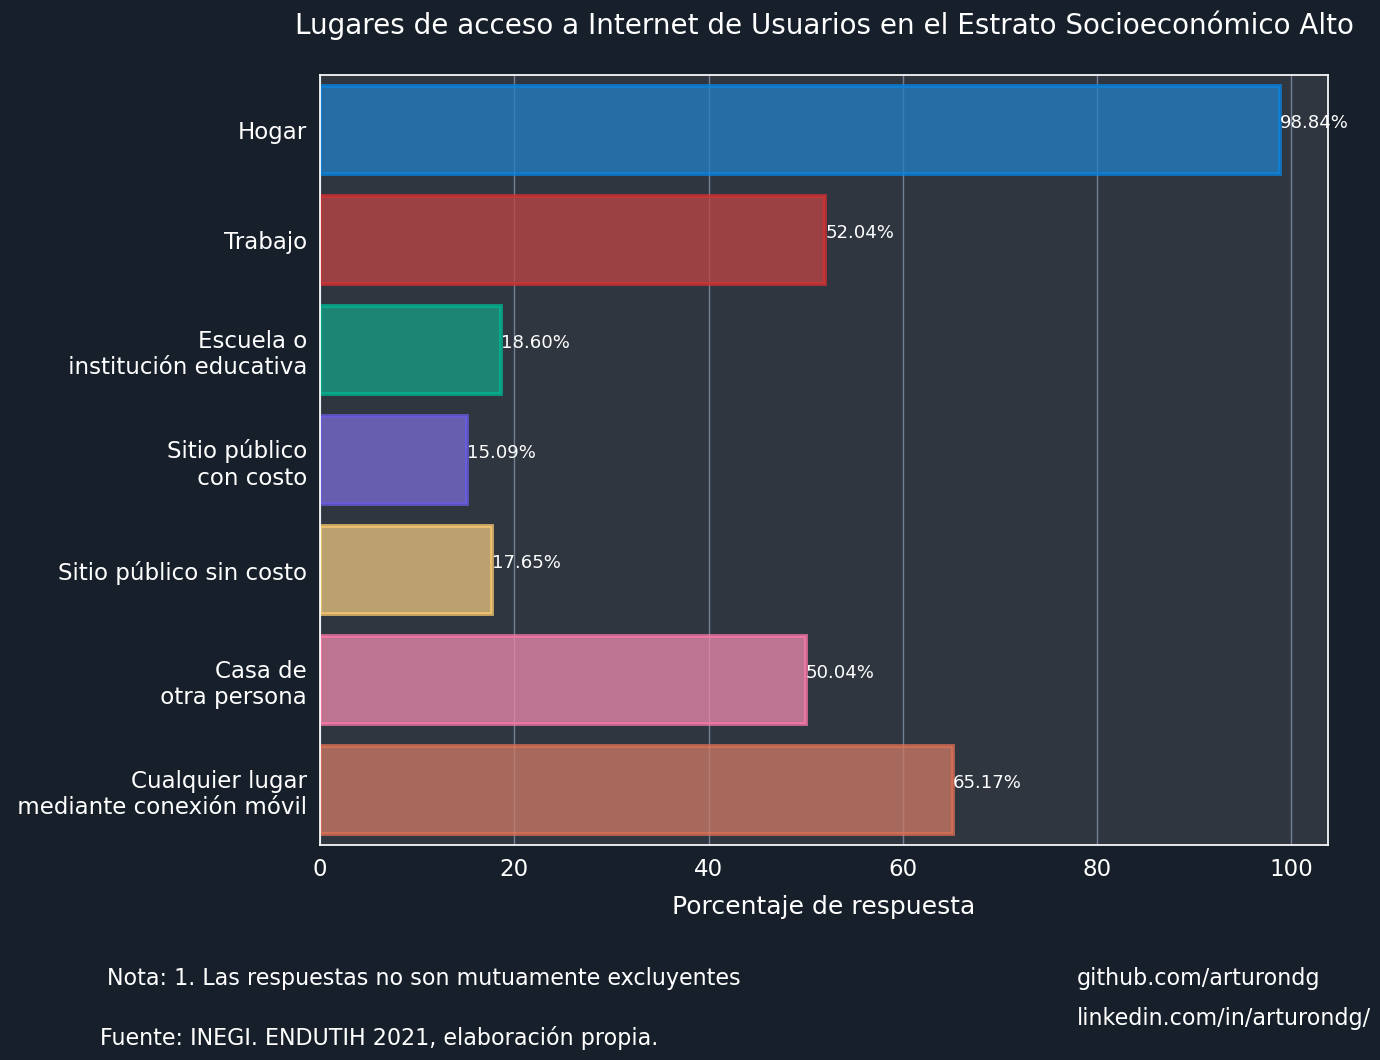

In [81]:
gráficar_resultados(Uso_internet_alto, "Alto")

### Lugares de acceso de los usuarios de Internet del estrato socioeconómico Medio Alto

Filtrar dataframe del estrato Medio Alto (3)

In [82]:
df_internet_medioalto = filtrando_estrato(3)
df_internet_medioalto.shape

(12401, 9)

Total de usuarios del Estrato Medio Alto (3)

In [83]:
Total_usuarios_inter_medioalto = total_estrato(3)
Total_usuarios_inter_medioalto

20182574

Visualizar respuestas totales ponderadas

In [84]:
Uso_internet_medioalto = visulizar_totales(df_internet_medioalto)
Uso_internet_medioalto

Hogar                                        19735787
Trabajo                                       9424877
Escuela o\n institución educativa             3409823
Sitio público\n con costo                     3153228
Sitio público sin costo                       3494815
Casa de\n otra persona                        9621369
Cualquier lugar\n mediante conexión móvil    11772758
dtype: int64

Obtener porcentaje a partir del total del Total de usuarios del Estrato Medio Alto

In [85]:
Uso_internet_medioalto = porcentajes(Uso_internet_medioalto, Total_usuarios_inter_medioalto)
Uso_internet_medioalto

Hogar                                        97.79
Trabajo                                      46.70
Escuela o\n institución educativa            16.89
Sitio público\n con costo                    15.62
Sitio público sin costo                      17.32
Casa de\n otra persona                       47.67
Cualquier lugar\n mediante conexión móvil    58.33
dtype: float64

Gráfica del Estrato Socioeconómico Medio Alto

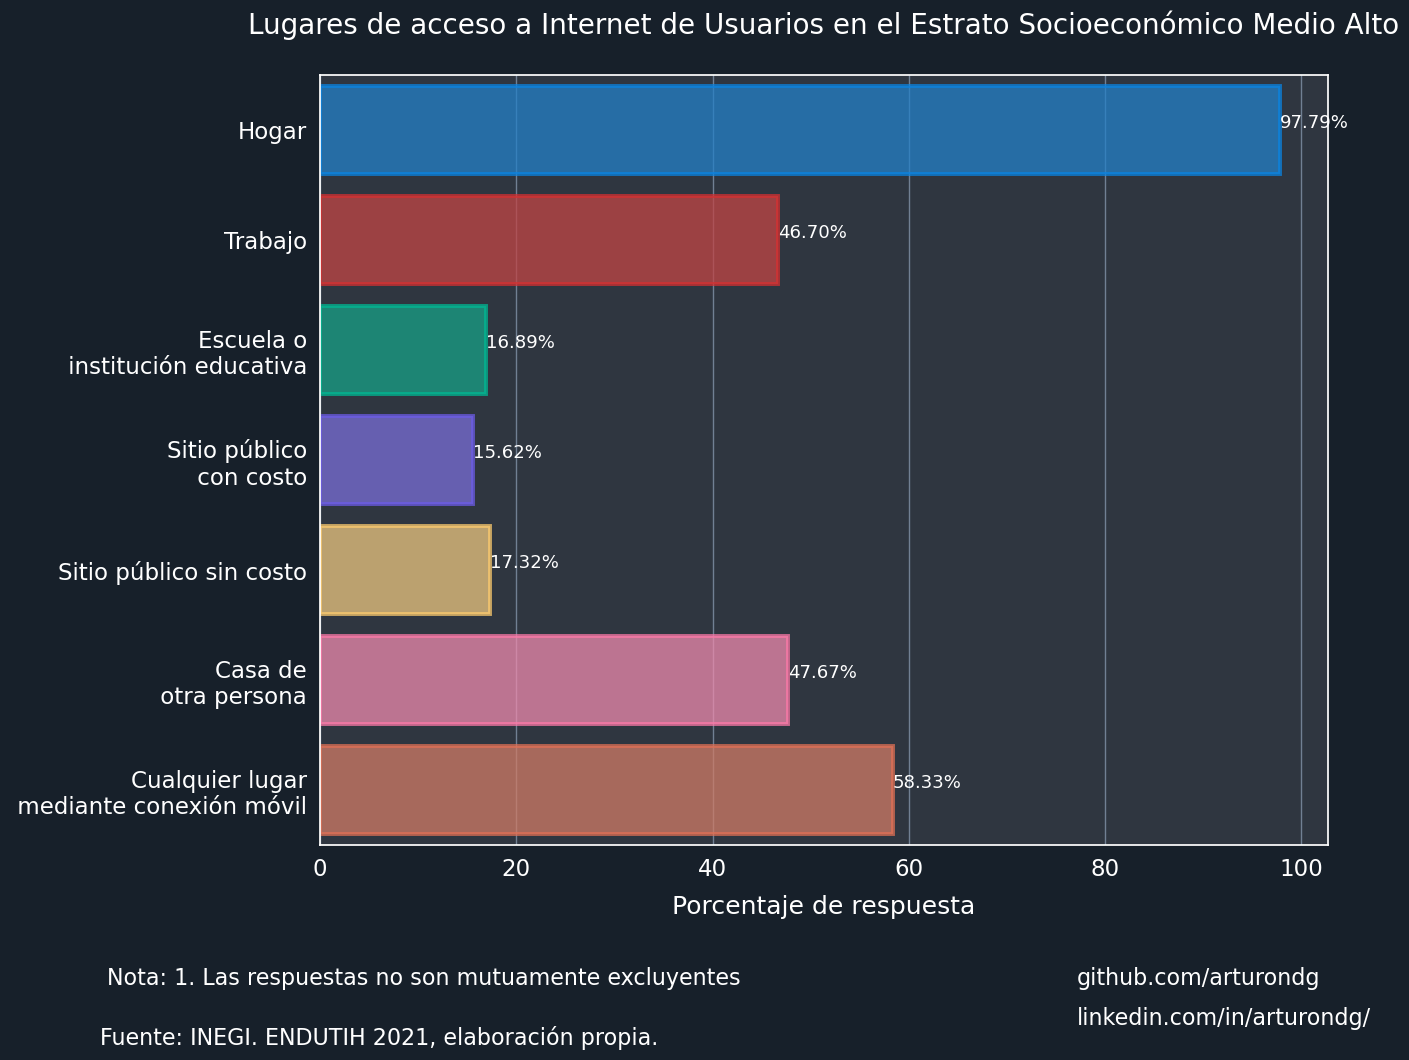

In [86]:
gráficar_resultados(Uso_internet_medioalto, "Medio Alto")

### Lugares de acceso de los usuarios de Internet del estrato socioeconómico Alto

Filtrar dataframe del estato Medio Bajo (2)

In [87]:
df_internet_mediobajo = filtrando_estrato(2)
df_internet_mediobajo.shape

(30686, 9)

Total de usuarios del Estrato Medio Bajo (2)

In [88]:
Total_usuarios_inter_mediobajo = total_estrato(2)
Total_usuarios_inter_mediobajo

46388508

Visualizar respuestas totales ponderadas

In [89]:
Uso_internet_mediobajo = visulizar_totales(df_internet_mediobajo)
Uso_internet_mediobajo

Hogar                                        44219140
Trabajo                                      16975901
Escuela o\n institución educativa             5968390
Sitio público\n con costo                     7828451
Sitio público sin costo                       6202742
Casa de\n otra persona                       20241250
Cualquier lugar\n mediante conexión móvil    24845133
dtype: int64

Obtener porcentaje a partir del total del Total de usuarios del Estrato Medio Bajo

In [90]:
Uso_internet_mediobajo = porcentajes(Uso_internet_mediobajo, Total_usuarios_inter_mediobajo)
Uso_internet_mediobajo

Hogar                                        95.32
Trabajo                                      36.60
Escuela o\n institución educativa            12.87
Sitio público\n con costo                    16.88
Sitio público sin costo                      13.37
Casa de\n otra persona                       43.63
Cualquier lugar\n mediante conexión móvil    53.56
dtype: float64

Gráfica del Estrato Socioeconómico Medio Bajo

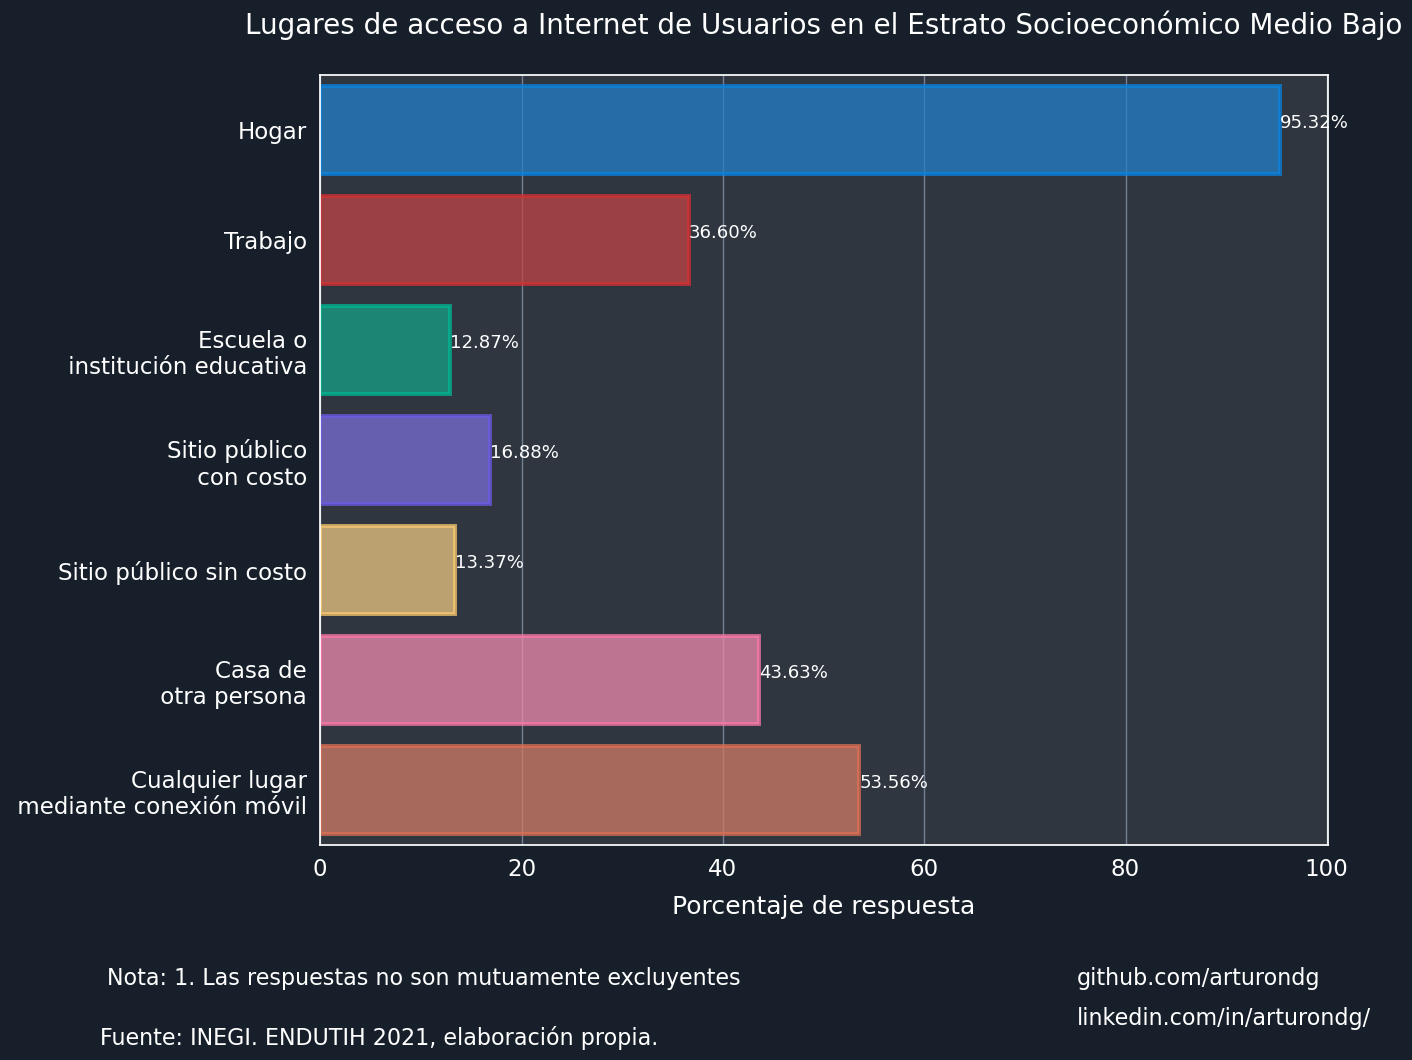

In [91]:
gráficar_resultados(Uso_internet_mediobajo, "Medio Bajo")

### Lugares de acceso de los usuarios de Internet del estrato socioeconómico Bajo

Filtrar dataframe del estrato Bajo

In [92]:
df_internet_bajo = filtrando_estrato(1)
df_internet_bajo.shape

(11202, 9)

Total de usuarios del Estrato Bajo

In [93]:
Total_usuarios_inter_bajo = total_estrato(1)
Total_usuarios_inter_bajo

12254998

Visualizar respuestas totales ponderadas

In [94]:
Uso_internet_bajo = visulizar_totales(df_internet_bajo)
Uso_internet_bajo

Hogar                                        10772015
Trabajo                                       2700429
Escuela o\n institución educativa             1259033
Sitio público\n con costo                     2412309
Sitio público sin costo                       1326591
Casa de\n otra persona                        4196239
Cualquier lugar\n mediante conexión móvil     5935049
dtype: int64

Obtener porcentaje a partir del total del Total de usuarios del Estrato Bajo

In [95]:
Uso_internet_bajo = porcentajes(Uso_internet_bajo, Total_usuarios_inter_bajo)
Uso_internet_bajo

Hogar                                        87.90
Trabajo                                      22.04
Escuela o\n institución educativa            10.27
Sitio público\n con costo                    19.68
Sitio público sin costo                      10.82
Casa de\n otra persona                       34.24
Cualquier lugar\n mediante conexión móvil    48.43
dtype: float64

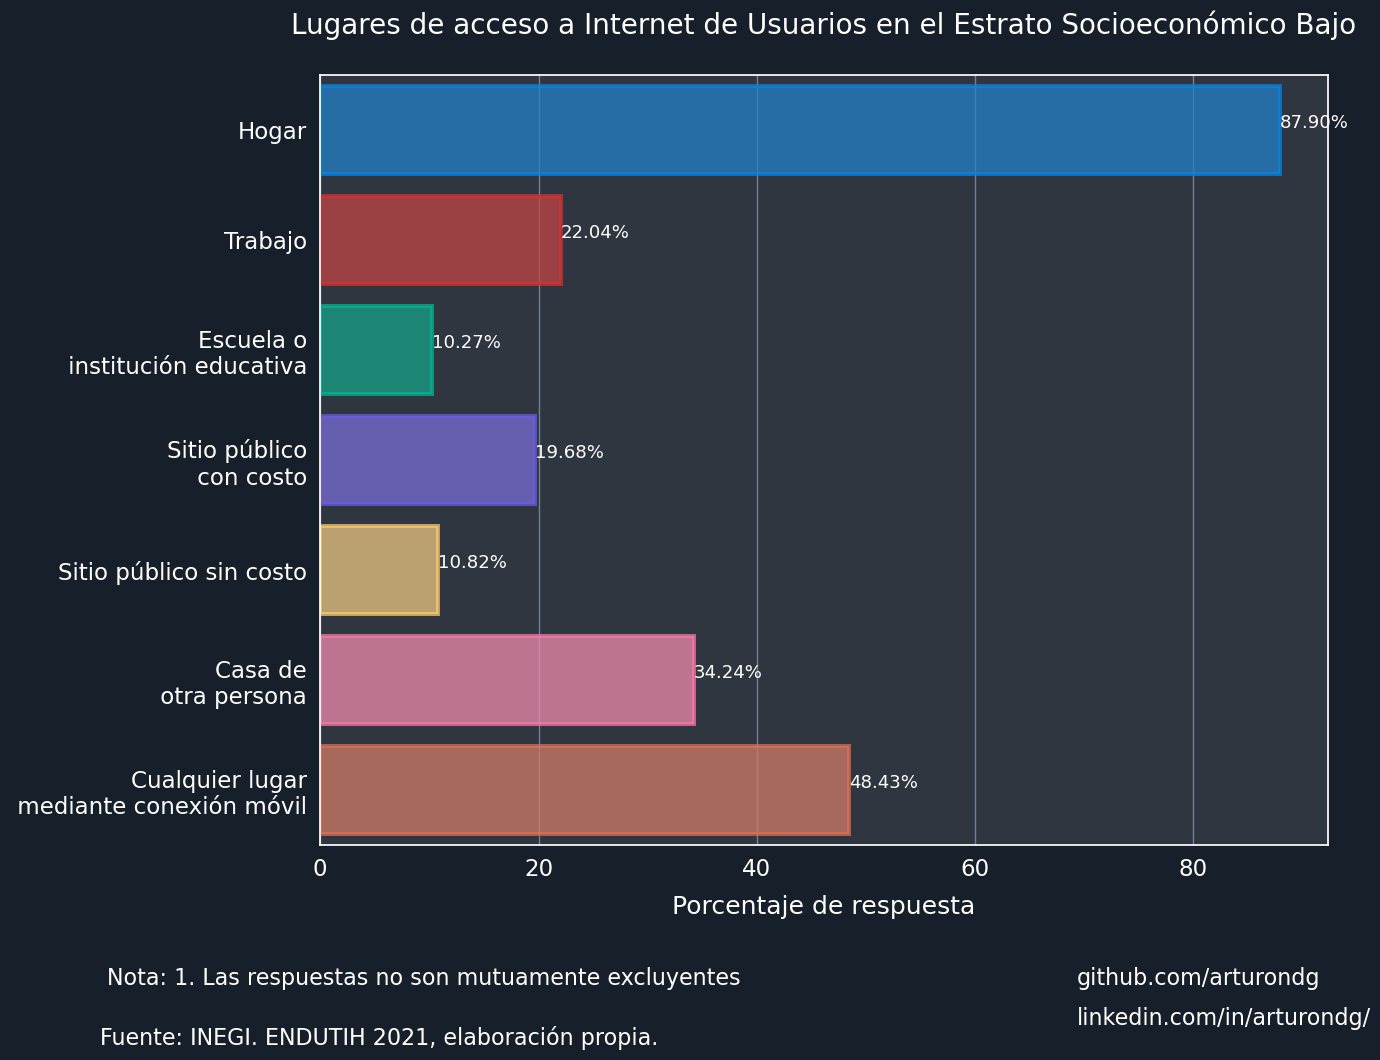

In [96]:
gráficar_resultados(Uso_internet_bajo, "Bajo")